# Machine Learning MRes Glossary

## Table of Contents:
- [Regression](#regression)
- [Cost Function](#cost-function)
- [Classification](#classification)
- [Loss Function](#loss-function)
- [Least Squares](#least-squares)
- [Gradient-Based Optimization](#gradient-based-optimization)
- [Gradient Descent](#gradient-descent)



# Regression
**Linear Regression** - The process of linear regression attempts to fit a straight line to a set of data, as well as possible. For this we require a metric known as the cost function (defined below), which essentially describes how poorly the line fits the data - this is to be minimised, corresponding to the best-fitting line. The aim of a linear regression model is to be able to accurately predict a continuous outcome given a set of predictors. This differs from classification, where the set of all outcomes is a finite number of categories.

The code performs linear regression using gradient descent to find the best-fit line for a given set of random data points (**x** and **y**). It iteratively updates the parameters (**theta**) based on the gradients of the cost function, aiming to minimize the mean squared error between the predicted values and the actual target values. The code then prints the final parameter values and visualizes the data points along with the learned linear regression line.

Iteration 0: Cost = 23.16269063840338
Iteration 100: Cost = 2.3960304799611474
Iteration 200: Cost = 2.0512085196160754
Iteration 300: Cost = 2.2546506740724785
Iteration 400: Cost = 2.3221404544880913
Iteration 500: Cost = 2.3397982017050603
Iteration 600: Cost = 2.3442057969839536
Iteration 700: Cost = 2.3452939087910947
Iteration 800: Cost = 2.345561812749283
Iteration 900: Cost = 2.3456277299335
Final parameters:
theta_0 = 3.1299230096458617
theta_1 = 2.10896562748133


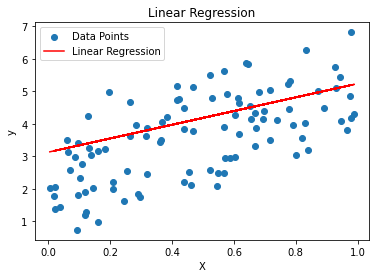

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data
np.random.seed(0)
x = np.random.rand(100, 1)
y = 2 + 3 * x + np.random.randn(100, 1)

# Initialize parameters
theta = np.random.randn(2, 1)
learning_rate = 0.01
num_iterations = 1000

# Perform gradient descent
for iteration in range(num_iterations):
    # Compute predictions
    y_pred = x.dot(theta[1]) + theta[0]
    
    # Compute gradients
    gradients = 2 / len(x) * x.T.dot(y_pred - y)
    
    # Reshape gradients to match theta shape
    gradients = gradients.mean(axis=1, keepdims=True)
    
    # Update parameters
    theta -= learning_rate * gradients
    
    # Compute cost, this is an example of a cost function
    cost = np.mean((y_pred - y) ** 2)
    
    # Print cost every 100 iterations
    if iteration % 100 == 0:
        print(f"Iteration {iteration}: Cost = {cost}")

# Print final parameters
print("Final parameters:")
print(f"theta_0 = {theta[0][0]}")
print(f"theta_1 = {theta[1][0]}")

# Plot the data points and the linear regression line
plt.scatter(x, y, label='Data Points')
plt.plot(x, x.dot(theta[1]) + theta[0], color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()



# Cost Function


The formula used to compute the cost is given by:

$
J(\theta) = \frac{1}{2} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2
$

Where:
- $J(\theta)$ represents the cost function.
- $m$ is the number of training examples.
- $h_\theta(x^{(i)})$ represents the predicted value for the $i$ th training example, obtained by multiplying the input features ($x^{(i)}$) with the parameters ($\theta$).
- $y^{(i)}$ represents the actual target value for the $i$ th training example.

The aim of linear regression is to find the optimal set of parameters ($c$, $\theta_1$, $\theta_2$, ...) that minimises the cost function. This involves finding the global minimum of the cost function on a multi-dimensional hypersurface in parameter-space- by executing the code and providing sample values for the input features (X), target values (y), and parameters (theta), you can compute the cost using the compute_cost function.


The aim of linear regression in the example above, is to find the optimal set of parameters ($c$, $\theta_1$, $\theta_2$, ...) that minimises the cost function. This involves finding the global minimum of the cost function on a multi-dimensional hypersurface in parameter-space.




In [3]:
import numpy as np

def compute_cost(X, y, theta):
    m = len(y)  # Number of training examples
    y_pred = X.dot(theta)  # Compute predictions
    cost = np.sum((y_pred - y) ** 2) / (2 * m)  # Compute cost
    return cost

# Example usage:
X = np.array([[1, 1], [1, 2], [1, 3]])  # Input features
y = np.array([[1], [2], [3]])  # Target values
theta = np.array([[0], [1]])  # Parameters

cost = compute_cost(X, y, theta)
print(f"Cost: {cost}")

# We provide sample values for the input features (X), target values (y), 
# and parameters (theta). We call the compute_cost function with these values 
# and print the resulting cost.

Cost: 0.0


# Classification

# Loss Function

# Least Squares

# Gradient-Based Optimisation (from the Statistics Course)

In Machine learning, often you will be optimising algorithms to improve the performance of the algorithm. In architechtures such as neural-networks, the weights of the network are *parameters* that can be varied in order to minimise some *loss* function. 

You will see many examples of optimisation and these days there are some extremely sophisticated methods for optimising complicated loss functions, however in this notebook we'll go over the most common starting point for these which is *gradient based optimisation*. 

In statistics, as we've seen in the lectures, the *likelihood* (or negative log-likelihood) function is our loss function and we often need to maximise (minimise) it with respect to one or more of its parameters. 

In general, this means we're looking for the set of parameter values ($\theta$) for which, 

$$
\frac{\partial q}{\partial \theta}= 0
$$

where $q = -\log(L)$

There are two algorithms that use the gradient of the likelihood to find the maximum point that we'll go over in this notebook. 

## Newton method

You are probably very familar with the Newton method (from school even?), which relies on the gradient of the function to find roots (or zeros) of the function. In our setup, since we are trying to find the zeros of the gradient function, we'll also need to know the 2nd derivative. 

This method is very reliable for 1-dimensional problems (one parameter that is being maximised). The way this works is that from some initial starting point $\theta_{0}$, the algorithm proposes the next step as, 

$$
\theta_{1} = \theta_{0} - \frac{q^{\prime}(\theta_{0})}{q^{\prime\prime}(\theta_{0})}
$$

where $q^{\prime} = \frac{dq}{d\theta}$, and $q^{\prime\prime} = \frac{d^{2}q}{d\theta^{2}}$.

The algorithm continues until some tolerance is reached, $\lvert q^{\prime}\rvert < \delta$ where $\delta$ is some small number greater than 0. 

We'll take a look at an example of this method where we have a unstable particle (let's say a muon) that decays after being produced in a particle collision. In these processes, the probability that the muon decays after a certain time depends on its lifetime ($\tau$),  

Suppose we had an experimental setup, capable of detecting when such decays were occuring and we marked down the times, after some $t_{0}$, that each decay occurs. The time of each decay will be a random variable and will be distributed according to an exponential decay function, 

$$
p(t) = \frac{1}{\tau} e^{-t/\tau}
$$

First, we'll grab some data to use for this. I've put some data in a `.csv` file. From this data, we want to find the value of $\tau$ that minimises the negative log-likelihood for this data. 

In [4]:
%matplotlib inline

import math
import numpy
import matplotlib.pyplot as plt

In [5]:
import pandas 
data_exp = pandas.read_csv("decay_data.csv")

plt.hist(data_exp["times"],bins=100)
plt.xlabel("$t - \mu s$")
plt.show()

data_exp = numpy.array(data_exp["times"].to_list())

FileNotFoundError: [Errno 2] No such file or directory: 'decay_data.csv'

The likelihood is just the product over all of the muon decay times, 

$$
L(\tau) = \prod_{i} \frac{1}{\tau} e^{-t_{i}/\tau}
$$

and the -ve log likelihood is, 

$$
q = -\ln(L) =  N\ln (\tau) + \sum_{i}^{N} \frac{t_{i}}{\tau}  
$$

In [ ]:
# define -ve log-likelihood
def q(data,tau):
 N = len(data)
 return N*math.log(tau) + sum(data)/tau

Let's see how the value of $q(\tau)$ changes as we change the value of $\tau$. Use the slider to see how changing the slope of the curve (the parameter $\tau$) changes the value of $q$. 

In [ ]:
import ipywidgets

xrange = numpy.linspace(0,16,100)

def pdf(x,tau):
    return (1./tau)*numpy.exp(-x/tau)

def plot_likelihood(tau):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
    ax1.hist(data_exp,bins=100,histtype='step',color='black',density='true')
    ax1.plot(xrange,pdf(xrange,tau),color='red')
    ax1.set_xlabel("$t - \mu s$")
    ax1.set_ylim(0,0.6)
    
    ax2.plot([tau],[q(data_exp,tau)],color='red',marker='o')
    ax2.set_ylim(1750,1900)
    ax2.set_xlim(1,4)
    ax2.set_xlabel("$\\tau$")
    ax2.set_ylabel("$q(\\tau)$")
    ax2.grid()

ipywidgets.interact(plot_likelihood,tau=(0,4,0.1))


interactive(children=(FloatSlider(value=2.0, description='tau', max=4.0), Output()), _dom_classes=('widget-int…

<function __main__.plot_likelihood(tau)>

We can make a simple static plot of this too

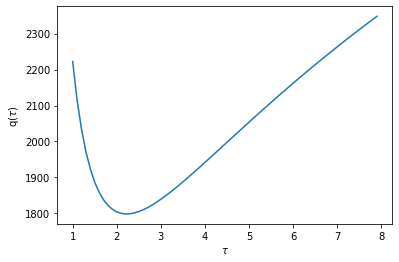

In [ ]:
x = numpy.arange(1,8,0.1)
y = [q(data_exp,xx) for xx in x]

plt.plot(x,y)
plt.xlabel("$\\tau$")
plt.ylabel("q($\\tau$)")
plt.show()

Now lets look for the minimum of this curve by finding value of $\tau$ for which $q^{\prime}=0$ using the Newton method. 

We need to write down the derivatives of $q$.

$$
q^{\prime} = \frac{N}{\tau}  -\frac{1}{\tau^{2}}\sum_{i}^{N} t_{i} 
$$

$$
q^{\prime\prime} = -\frac{N}{\tau^{2}} + \frac{2}{\tau^{3}}\sum_{i}^{N} t_{i} 
$$

In [ ]:
# define the derivative of the -ve log-likelihood
def dq(data, tau):
 N = len(data)
 return N/tau - sum(data)/(tau*tau)

# define thei second derivative of the -ve log-likelihood
def d2q(data, tau):
 N = len(data)
 return -N/(tau*tau) + 2*sum(data)/(tau*tau*tau)

We start by initialising the algorithm and setting a tolerance for when to stop searching.

In [ ]:
# numerical minimum
tol = 0.01
init_tau = 3
eps = 100

# keep a record of the steps
steps = []

while eps > tol:
 steps.append([init_tau,q(data_exp,init_tau)])
 qp = dq(data_exp,init_tau)
 eps = abs(qp)
 init_tau = init_tau - qp/d2q(data_exp,init_tau)
 if init_tau < 0 : init_tau = 0.1
 

numerical_min = init_tau
print("minimum at tau = ",numerical_min, "microseconds")
print("took %d steps"%len(steps))

minimum at tau =  2.222246828655853 microseconds
took 7 steps


![Optimise](explh.gif)

The muon lifetime is known to be $\sim 2.2 \mu s$. This is actually an  example of a maximum likelihood estimate for the muon lifetime. 

## Gradient Descent 

For functions with more than one variable, we  can use a gradient descent algorithm to find minima and maxima. These methods only rely on the first derivative (the gradient) to find the best direction to step in to find the minimum (or maximum). They don't use the second derivative because for a large number of parameters $n$, the number of terms in the second derivative grows as $n^{2}$ so this can get quite costly. 

There are  a number of subtle different algorithms which rely on gradient descent but we'll go over a simple example. The  way this works is as follows. 

First, we initialise the algorithm at some set of values for the parameters $\boldsymbol{\theta}_{init}$. Then we calcualte the gradient of the negative log-likelihood - $\nabla(q)\rvert_{\boldsymbol{\theta}_{init}}$ - at that initial point. The gradient defines a direction in which the negative log-likelihood changes most rapidly - this makes this direction a good direction to search for a smaller value of $q$.

$$
\begin{align}
\nabla(q)\rvert_{\boldsymbol{\theta}_{init}} &=   
        \begin{bmatrix}
           \frac{\partial q}{\partial \theta_{1}} \\
           \frac{\partial q}{\partial \theta_{2}} \\
           \vdots \\
           \frac{\partial q}{\partial \theta_{n}}
        \end{bmatrix}_{\boldsymbol{\theta}=\boldsymbol{\theta}_{init}}
\end{align}   
$$

Since we want to *decrease* $q$, we need to move against this gradient. We step along the negative gradient direction until we find a new minimum - i.e we pick a step size $h$ and keep adding it to the initial point until the value of $q$ stops decreasing, 


$$
\boldsymbol{\theta}_{k} = k\times h - \nabla(q)\rvert_{\boldsymbol{\theta}_{init}} 
$$

At the value of $k$ such that we're no longer decreasing $q$ (lets call it $k*$), we recalculate the gradient and find a new direction to go in. 

$$
\nabla(q)\rvert_{\boldsymbol{\theta}_{k*}}
$$

We keep repeating this process until the modulus of the gradient gets close enough to zero (say is smaller than some tolerance $\epsilon$, that means we keep iterating until, 

$$
\lvert \nabla(q)\rvert_{\boldsymbol{\theta}} \rvert = \sqrt{\left(\frac{\partial q}{\partial \theta_{1}}\right)^{2} + \left(\frac{\partial q}{\partial \theta_{2}}\right)^{2}+...+\left(\frac{\partial q}{\partial \theta_{n}}\right)^{2}}< \epsilon
$$

Let's look at an example where $n=2$ and the data is assumed to be distributed as a Gaussian with parameters $\mu$ and $\sigma$. We want to find the maximum likelihood estimates $\hat{\mu}$ and $\hat{\sigma}$. 

We'll read in some data from the file `data_grad_desc.csv`. 

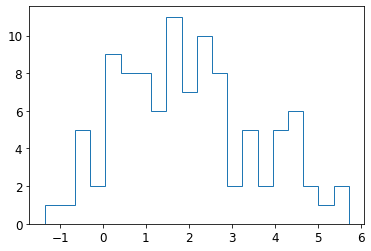

In [ ]:
import numpy,pandas
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

from scipy.stats import norm
data = pandas.read_csv("data_grad_desc.csv")
data = data['values'].to_numpy()
plt.hist(data,bins=20,histtype='step')
plt.show()

Let's see how different values of the Gaussian parameters $\mu$ and $\sigma$ compare when plotted on top of the data, this timee as a histogram of the density.

In [ ]:
from scipy.stats import norm 
xrange = numpy.linspace(-2,6,100)

def plot_gaussian(mu,sigma):
    
    plt.hist(data,bins=20,histtype='step',density=True)
    plt.plot(xrange,norm.pdf(xrange,mu,sigma),color='red')
    plt.xlabel("$X$")
    plt.ylim(0,0.4)


ipywidgets.interact(plot_gaussian,mu=(1,3,0.1),sigma=(0.5,3,0.1))

interactive(children=(FloatSlider(value=2.0, description='mu', max=3.0, min=1.0), FloatSlider(value=1.70000000…

<function __main__.plot_gaussian(mu, sigma)>

Next we can define the negative log-likelihood and plot it as a function of $\mu$ and $\sigma$. Remember, the likelihood is just the product over the Gaussian probability density for each value in our dataset. 

The negative log-likelihood in this case is going to be (it's easy to show it) a sum over terms for all 101 points in our dataset. 

$$
q(\mu,\sigma) = -\ln(L(\mu,\sigma)) = \sum_{i=1}^{101} \left[ \ln(\sigma\sqrt{2\pi}) + \frac{1}{2}\frac{\left(X_{i}-\mu\right)^{2}}{\sigma^{2}} \right]
$$

I've also subtracted the smallest value of the negative log-likelihood so that the numbers we have to deal with are more reasonable (of course this won't change where the minimum is). 

Text(0, 0.5, '$\\sigma$')

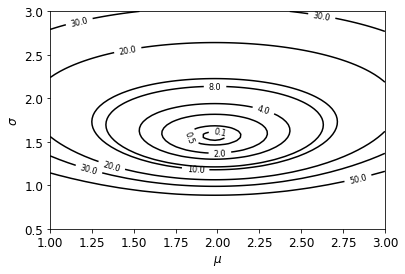

In [ ]:
sqrt2pi = (2*numpy.pi)**0.5 

def neg_log_likelihood(point):
    mean=point[0]
    sigma=point[1]
    return sum([numpy.log(sqrt2pi*sigma) + 0.5*(x-mean)*(x-mean)/(sigma*sigma) for x in data])
    
def sum_neg_log_likelihood(mean,sigma):
    return neg_log_likelihood([mean,sigma])

mu    = numpy.linspace(1, 3, 70)
sigma = numpy.linspace(0.5, 3, 70)

X,Y = numpy.meshgrid(mu,sigma)

logL = sum_neg_log_likelihood(X,Y)
# These are large numbers so subtract the smallest one 
logL = logL-logL.min()

contours = plt.contour(X, Y, logL, colors='black',levels=[0.1,0.5,2,4,8,10,20,30,50])
plt.clabel(contours, inline=True, fontsize=8)
plt.xlabel("$\mu$")
plt.ylabel("$\sigma$")

Next we define the gradient and run through our optimisation. Each step is given by the function `gradient_optimise_step` and it returns a new point and the magnitude of the gradient at that point. 

In [ ]:
def grad_nll(point):
    mean = point[0]
    sigma = point[1]
    ddmu    = sum([mean/(sigma*sigma) - x/(sigma*sigma) for x in data])
    ddsigma = sum([1./sigma - (1./(sigma*sigma*sigma))*(x-mean)*(x-mean) for x in data])
    return numpy.array([ddmu,ddsigma])

def modulus(point):
    return (point[0]**2+point[1]**2)**0.5

# inititial point -> mu=1.25, sigma=2.5
init = numpy.array([1.25,2.5])
grad_size = modulus(grad_nll(init))

def gradient_optimise_step(init):

  # 1. find the gradient at this point 
  vec = grad_nll(init)

  # 2. Do a very quick line search to find where the minimum is along the line (pick step size of 0.001)
  min_nll = neg_log_likelihood(init)
  start = init  

  for i in range(10):
    new_point = start-0.001*vec
    new_nll   = neg_log_likelihood(new_point)
    if new_nll < min_nll:
      min_nll =  new_nll
      start = new_point
      #print(" line search -> ", new_point,new_nll)
    else: break      
  return new_point, modulus(grad_nll(new_point))

step = []
step.append(init)
while grad_size > 1:
  new,grad_size = gradient_optimise_step(init)
  init = new 
  step.append(init)

print("Minimum found at - ",init)

Minimum found at -  [1.96835639 1.56718272]


![Grad](grad.gif)

Of course, we don't need to write optimisation routines ourselves since there's many good packages out there that have done this for us. For the rest of this course, we'll use the `scipy` and `iminuit` packages for optimisation problems. 